Integrantes del equipo:
- Mariano Villanueva Aguilar
- Santiago Padilla Arias
- Juan Jorge Camarena Rivas


## Título: Minimizar el costo para tener una taza correcta de concreto de una proporción 1 : 3 : 3

### Objetivos:

#### Objetivo general:
Planear la entrega de materiales por medio de diferentes proveedores para poder preparar un concreto de proporcion 1:3:3.

#### Objetivos específicos:
- Encontrar una solución adecuada y que sea economicamente factible para cumplir con el volumen de concreto requerido
- Llegar al resultado mediante una programación líneal
- Asegurar que se entregue la cantidad de materia prima necesaria para satisfacer las necesidades.


# Problema a solucionar
Se tiene una construcción vertical, de la cual se necesita empezar el colado de la losa de entrepiso lo antes posible, por lo que para conseguir la materia prima del concreto se requieren distintos proveedores, no obstante al ser diferentes empresas e industrias tienen diferentes precios y diferentes maneras de manejar la materia prima.

Para el proyecto se necesitan $ 100m^3$ de concreto, de la cual seguiremos la proporción establecida por las normativas NMX-C-155 y ASTM C 150 y las recomendaciones de la concretera CEMEX lo que nos establece que:


![](Concreto.jpg)

Al momento de contarctar las empresas nos establecieron que por mínimo debemos de pedir ciertas cantidades para Arena y para la Grava, nos obligan a pedir en tandas de camiones de $ 7m^3$ y del cemento nos cobran por bulto, es importante tomar en cuenta que debemos de hacer una compra mínima. Otro punto por agregar es que las empresas también poseen límitada cantidad de productos. Con esta información completamos la siguiente tabla:

![](Arena2.png)

Dadas las restricciones del problema, debemos de llegar a cierta cantidad de materia prima para elaborar la mezcla que nos producirá un aproximado de $ 100m^3$, por lo que se hizo la siguiente tabla con la materia prima necesaria:

![](Total2.png) 

Cabe aclarar que se convirtió el cemento de kilogramos a número de sacos, debido a que es el sistema por el que se vende el cemento y cada saco es de 50 Kg

### Modelo que representa el problema


### Solución del problema de optimización.
1. Identificar criterio de optimización
Minimizar el costo de los productos

2. Variables de control:

Provedores:

  - Cemento gris de aceros murillo $XA$
    
    
  - Cemento gris de Materiales viruete $XB$
    
    
  - Cemento gris de FerreMateriales Riosa $XC$
    
    
  - Arena Gris de Materiales de la Torre $XD$
    
    
  - Arena de Río de Acarreos Delgado $XE$
    
    
  - Arena de Río de Ferremateriales Riosa $XF$
    
    
  - Grava 3/4 de Materiales de la Torre $XG$
    
    
  - Grava 3/4 de Acarreos Delgado $XH$
    
    
  - Grava 3/4 de Ferremateriales Riosa $XI$


$XE$


3. Función de costo
 - $ f(XA, XB, XC, XD, XE ,XF, XG, XH, XI) = 245 XA + 225XB + 254 XC + 244 XD + 286 XE + 283XF + 484XG + 500XH + 502XI $


4. Información adicional

Cemento gris
$$ XA+ XB+XC = 600 sacos $$
Arena
$$ XD+ XE+XF = 65 m^3$$
Grava 3/4
$$ XG+ XH+XI = 65 m^3$$
Minimo de compra:
$$ XA \geq 100$$
$$ XB \geq 75$$
$$ XC \geq 80$$

Stock:
$$ XA \leq 210$$
$$ XB \leq 90$$
$$ XC \leq 300$$

Minimo de compra:
$$ XD \geq 7$$
$$ XE \geq 7$$
$$ XF \geq 7$$
$$ XG \geq 7$$
$$ XH \geq 7$$
$$ XI \geq 7$$

Stock:
$$ XD \leq 21$$
$$ XE \leq 35$$
$$ XF \leq 14$$
$$ XG \leq 28$$
$$ XH \leq 14$$
$$ XI \leq 42$$

5. Modelo

In [54]:
import numpy as np
c = np.array([245, 225, 254, 244, 286, 283, 484, 500, 502])
Aub = np.array ([
     [-1,-1, -1, 0, 0, 0, 0, 0, 0],
     [0,  0,  0,  -1, -1, -1, 0, 0, 0],
     [0,  0,  0, 0,  0,  0, -1, -1, -1],
    
     [-1,  0,  0, 0,  0,  0, 0, 0,  0],
     [0,  -1,  0, 0,  0,  0, 0, 0,  0],
     [0,  0,  -1, 0,  0,  0, 0, 0,  0],
    
     [1,  0,  0, 0,  0,  0, 0, 0,  0],
     [0,  1,  0, 0,  0,  0, 0, 0,  0],
     [0,  0,  1, 0,  0,  0, 0, 0,  0],
    
     [0,  0,  0, -1,  0,  0, 0, 0,  0],
     [0,  0,  0, 0,  -1,  0, 0, 0,  0],
     [0,  0,  0, 0,  0,  -1, 0, 0,  0],
     [0,  0,  0, 0,  0,  0, -1, 0,  0],
     [0,  0,  0, 0,  0,  0, 0, -1,  0],
     [0,  0,  0, 0,  0,  0, 0, 0,  -1],

     [0,  0,  0, 1,  0,  0, 0, 0,  0],
     [0,  0,  0, 0,  1,  0, 0, 0,  0],
     [0,  0,  0, 0,  0,  1, 0, 0,  0],
     [0,  0,  0, 0,  0,  0, 1, 0,  0],
     [0,  0,  0, 0,  0,  0, 0, 1,  0],
     [0,  0,  0, 0,  0,  0, 0, 0,  1]
])
bub = np.array([
    [-600],
    [-65],
    [-65],
    
    [-100],
    [-75],
    [-80],
    
    [210],
    [90],
    [300],
   
    [-7],
    [-7],
    [-7],
    [-7],
    [-7],
    [-7],
    [21],
    [35],
    [14],
    [28],
    [14],
    [42],
    
])


In [56]:
import scipy.optimize as opt
sol=opt.linprog(c,Aub,bub)
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 197664.0
              x: [ 2.100e+02  9.000e+01  3.000e+02  2.100e+01  3.000e+01
                   1.400e+01  2.800e+01  1.400e+01  2.300e+01]
            nit: 0
          lower:  residual: [ 2.100e+02  9.000e+01  3.000e+02  2.100e+01
                              3.000e+01  1.400e+01  2.800e+01  1.400e+01
                              2.300e+01]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  

In [58]:
sol.x

array([210.,  90., 300.,  21.,  30.,  14.,  28.,  14.,  23.])

Text(0, 0.5, 'Cantidad de costales')

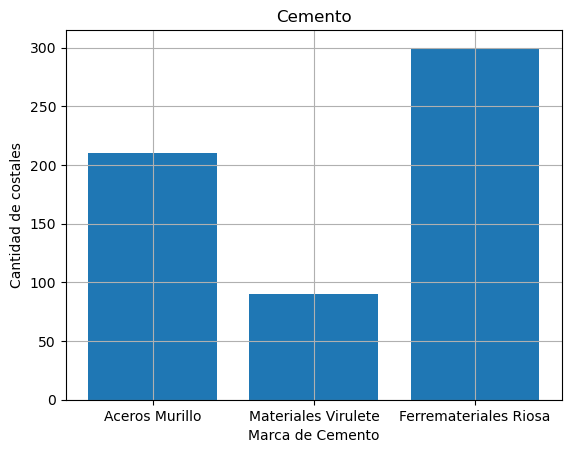

In [60]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Cemento")
plt.bar(["Aceros Murillo", "Materiales Virulete", "Ferremateriales Riosa"], [sol.x[0],sol.x[1],sol.x[2]])
plt.grid()
plt.xlabel("Marca de Cemento")
plt.ylabel("Cantidad de costales")


Text(0, 0.5, 'Cantidad metros cubicos')

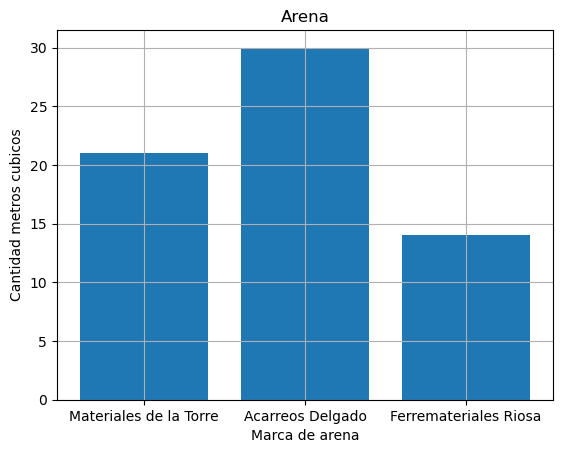

In [62]:
plt.figure()
plt.title("Arena")
plt.bar(["Materiales de la Torre", "Acarreos Delgado", "Ferremateriales Riosa"], [sol.x[3],sol.x[4],sol.x[5]])
plt.grid()
plt.xlabel("Marca de arena")
plt.ylabel("Cantidad metros cubicos")

Text(0, 0.5, 'Cantidad metros cubicos')

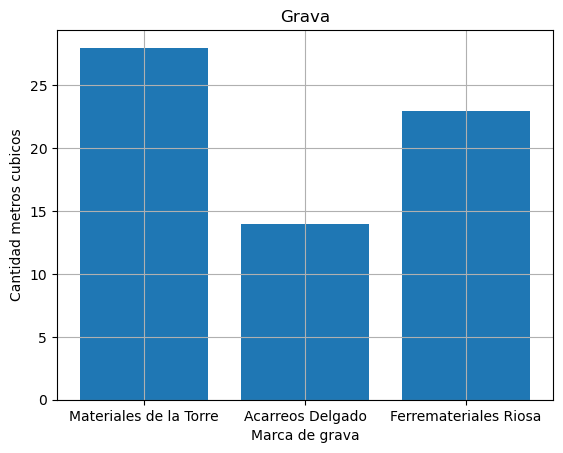

In [64]:
plt.figure()
plt.title("Grava")
plt.bar(["Materiales de la Torre", "Acarreos Delgado", "Ferremateriales Riosa"], [sol.x[6],sol.x[7],sol.x[8]])
plt.grid()
plt.xlabel("Marca de grava")
plt.ylabel("Cantidad metros cubicos")

El precio total es de:

In [67]:
sol.fun

197664.0

Por lo que se podemos asimilar que nuestra cotización es viable, ya que cumplimos con el mínimo viable que necesitamos en nuestro proyecto, con el menor precio posible, además cumpliendo con las especificaciones que por contrato se nos solicitan, teniendo los 5000 sacos que se necesitan y pagando 1157192 pesos por el total.

Referencias:

Aceros Murillo. (s.f.). Aceros Murillo: Empresa especializada en venta de acero. https://acerosmurillo.com/Enlaces a un sitio externo.

Comunicación personal con Aceros Murillo. (23 de septiembre de 2024).

Comunicación personal con Materiales Viruete. (23 de septiembre de 2024).

Comunicación personal con Materiales Riosa. (23 de septiembre de 2024).